Scope: Our project is to uncover data trends among all star MLB pitchers from 2016-2021. We will examine relationships between their strikeout %, ERA (earned run average) , BB (walk)%, in their all star seasons, as well as some of their physical dimensions and place of birth (state if domestic, country if foreign born).

In [1]:
import pandas as pd
from pprint import pprint
import requests
import json
import csv
from matplotlib import pyplot as plt

In [2]:
fpath = 'Resources/2015-2020_alldata_clean.csv'
player_stats= pd.read_csv(fpath)
fpath = 'Resources/2015_2019_All_Star_Rosters.csv'
allstar_rosters=pd.read_csv(fpath)
fpath = 'Resources/roster_and_stats_merged.csv'
stats_df = pd.read_csv(fpath,index_col=0)
players_df=pd.read_csv('Resources/dimensions_dict.csv',index_col=0)

In [3]:
df1 = player_stats[player_stats.isna().any(axis=1)]
df1.to_csv('Resources/removed.csv')

In [4]:
dna_player_stats_df = player_stats.dropna()
roster_df = allstar_rosters

In [5]:
dna_player_stats_df

,Rk,Player,Year,Age,Tm,Lg,G,GS,CG,SHO,...,PO,BK,WP,BA,OBP,SLG,OPS,OPS+,Pit,Str
0,1,Austin Voth\vothau01,2020,28,WSN,NL,11,11,1,0,...,0,0,1,0.281,0.351,0.571,0.923,148.0,895,565
1,2,Wander Suero\suerowa01,2020,28,WSN,NL,22,0,0,0,...,0,0,2,0.227,0.324,0.318,0.642,78.0,381,248
2,3,Stephen Strasburg\strasst01,2020,31,WSN,NL,2,2,0,0,...,0,0,0,0.364,0.391,0.546,0.937,154.0,83,52
3,4,Max Scherzer\scherma01,2020,35,WSN,NL,12,12,1,0,...,0,0,6,0.260,0.319,0.424,0.742,102.0,1212,793
4,5,Anibal Sanchez\sanchan01,2020,36,WSN,NL,11,11,0,0,...,0,2,0,0.313,0.371,0.536,0.907,146.0,971,602
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4592,4593,Jonathan Broxton\broxtjo01,2015,31,TOT,NL,66,0,0,0,...,0,0,0,0.266,0.329,0.437,0.766,112.0,997,656
4593,4594,Aaron Brooks\brookaa01,2015,25,TOT,AL,13,9,0,0,...,1,0,0,0.322,0.368,0.520,0.888,143.0,885,570
4594,4595,Matthew Boyd\boydma01,2015,24,TOT,AL,13,12,0,0,...,2,0,4,0.313,0.367,0.612,0.979,164.0,1003,625
4595,4596,Joe Blanton\blantjo01,2015,34,TOT,ML,36,4,0,0,...,1,0,2,0.240,0.279,0.389,0.668,82.0,1156,754


In [6]:
roster_df

,Year,Player
0,2019,Shane Bieber
1,2019,Aroldis Chapman
2,2019,Gerrit Cole
3,2019,Lucas Giolito
4,2019,Shane Greene
...,...,...
147,2015,Darren O'Day
148,2015,Glen Perkins
149,2015,David Price
150,2015,Chris Sale


In [7]:
dna_player_stats_df[['Player Name','Shortname']] = dna_player_stats_df.Player.str.split('\\', expand=True)
dna_player_stats_df['K%'] = dna_player_stats_df['K%'].str.strip('%').astype(float)
dna_player_stats_df['BB%'] = dna_player_stats_df['BB%'].str.strip('%').astype(float)
cleaned_stats_df = dna_player_stats_df.drop(columns = ['Player','Rk','Tm','Lg','G','GS','CG','SHO','GF','W','L','W-L%',
                        'SV','IP','H','R','ER','BB','SO','FIP','WP','BA','OBP','SLG','OPS',
                       'OPS+','Pit','Str','BAbip','HR','BF','AB','HBP','SH','SF','GDP','SB',
                       'CS','PO','BK','2B','3B','IBB']).copy()

C:\Users\thepi\anaconda3\lib\site-packages\pandas\core\frame.py:3191: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]
<ipython-input-7-51a6095a6f60>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dna_player_stats_df['K%'] = dna_player_stats_df['K%'].str.strip('%').astype(float)
<ipython-input-7-51a6095a6f60>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the docume

In [8]:
cleaned_stats_df = cleaned_stats_df.reindex(columns = ['Player Name','Shortname','Year','Age',
                                                     'ERA','ERA+','K%','BB%'])
cleaned_stats_df = cleaned_stats_df.loc[cleaned_stats_df['Year'] != 2020,:]
cleaned_stats_df

,Player Name,Shortname,Year,Age,ERA,ERA+,K%,BB%
736,Austin Voth,vothau01,2019,27,3.3,134.0,25.3,7.5
737,Wander Suero,suerowa01,2019,27,4.54,97.0,27.4,8.8
738,Stephen Strasburg,strasst01,2019,30,3.32,133.0,29.9,6.7
739,Tony Sipp,sippto01,2019,35,4.71,95.0,19.6,9.8
740,Max Scherzer,scherma01,2019,34,2.92,151.0,35.1,4.8
...,...,...,...,...,...,...,...,...
4592,Jonathan Broxton,broxtjo01,2015,31,4.62,86.0,24.5,8.6
4593,Aaron Brooks,brookaa01,2015,25,6.67,60.0,15.2,5.6
4594,Matthew Boyd,boydma01,2015,24,7.53,54.0,17.1,7.9
4595,Joe Blanton,blantjo01,2015,34,2.84,143.0,25.6,5.2


In [9]:
cleaned_stats_df['K%'] = cleaned_stats_df['K%']/100
cleaned_stats_df['BB%'] = cleaned_stats_df['BB%']/100

In [10]:
cleaned_stats_df.to_csv('league_stats.csv')

In [11]:
merged_df = pd.merge(roster_df, cleaned_stats_df,
                     left_on=['Player','Year'],right_on=['Player Name','Year'],how='left')
merged_df

,Year,Player,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,2019,Shane Bieber,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,2019,Aroldis Chapman,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2019,Gerrit Cole,Gerrit Cole,colege01,28.0,2.5,185.0,0.399,0.059
3,2019,Lucas Giolito,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,2019,Shane Greene,Shane Greene,greensh02,30.0,2.3,207.0,0.254,0.068
...,...,...,...,...,...,...,...,...,...
147,2015,Darren O'Day,Darren O'Day,odayda01,32.0,1.52,272.0,0.319,0.055
148,2015,Glen Perkins,Glen Perkins,perkigl01,32.0,3.32,123.0,0.227,0.042
149,2015,David Price,David Price,priceda01,29.0,2.45,164.0,0.253,0.053
150,2015,Chris Sale,Chris Sale,salech01,26.0,3.41,114.0,0.321,0.049


In [12]:
merged_df.drop(columns = 'Player',inplace=True)
merged_df

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2019,Gerrit Cole,colege01,28.0,2.5,185.0,0.399,0.059
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,2019,Shane Greene,greensh02,30.0,2.3,207.0,0.254,0.068
...,...,...,...,...,...,...,...,...
147,2015,Darren O'Day,odayda01,32.0,1.52,272.0,0.319,0.055
148,2015,Glen Perkins,perkigl01,32.0,3.32,123.0,0.227,0.042
149,2015,David Price,priceda01,29.0,2.45,164.0,0.253,0.053
150,2015,Chris Sale,salech01,26.0,3.41,114.0,0.321,0.049


In [13]:
merged_df.to_csv('Resources/roster_and_stats_merged.csv')

## API Call

In [14]:
stats_df.head()

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106
2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081
4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068


In [15]:
stats_df['Player_url'] = stats_df['Player Name'].replace(' ','%25',regex=True)
stats_df

,Year,Player Name,Shortname,Age,ERA,ERA+,K%,BB%,Player_url
0,2019,Shane Bieber,biebesh01,24.0,3.28,147.0,0.302,0.047,Shane%25Bieber
1,2019,Aroldis Chapman,chapmar01,31.0,2.21,206.0,0.362,0.106,Aroldis%25Chapman
2,2019,Gerrit Cole,colege01,28.0,2.50,185.0,0.399,0.059,Gerrit%25Cole
3,2019,Lucas Giolito,giolilu01,24.0,3.41,134.0,0.323,0.081,Lucas%25Giolito
4,2019,Shane Greene,greensh02,30.0,2.30,207.0,0.254,0.068,Shane%25Greene
...,...,...,...,...,...,...,...,...,...
147,2015,Darren O'Day,odayda01,32.0,1.52,272.0,0.319,0.055,Darren%25O'Day
148,2015,Glen Perkins,perkigl01,32.0,3.32,123.0,0.227,0.042,Glen%25Perkins
149,2015,David Price,priceda01,29.0,2.45,164.0,0.253,0.053,David%25Price
150,2015,Chris Sale,salech01,26.0,3.41,114.0,0.321,0.049,Chris%25Sale


## code for API call - already ran/exported/reimported from Resources
base_url = "http://lookup-service-prod.mlb.com/json/named.search_player_all.bam?sport_code='mlb'&active_sw='Y'&name_part="
players = stats_df['Player_url']
players_dict = []
for player in players:
    url=f"{base_url}'{player}'"
    response = requests.get(url).json()
    players_dict.append(response)
    

cleaned_players_dict = []
count = 0
for player in players_dict:
    try:
        cleaned_players_dict.append(players_dict[count]['search_player_all']['queryResults']['row'])
    except:
        print(f'{count} has no data')
    count += 1
cleaned_players_dict

new_cleaned_players_list = [x for x in cleaned_players_dict if len(x)==29]
players_df = pd.DataFrame.from_records(new_cleaned_players_list)
players_df.to_csv('Resources/dimensions_dict.csv')

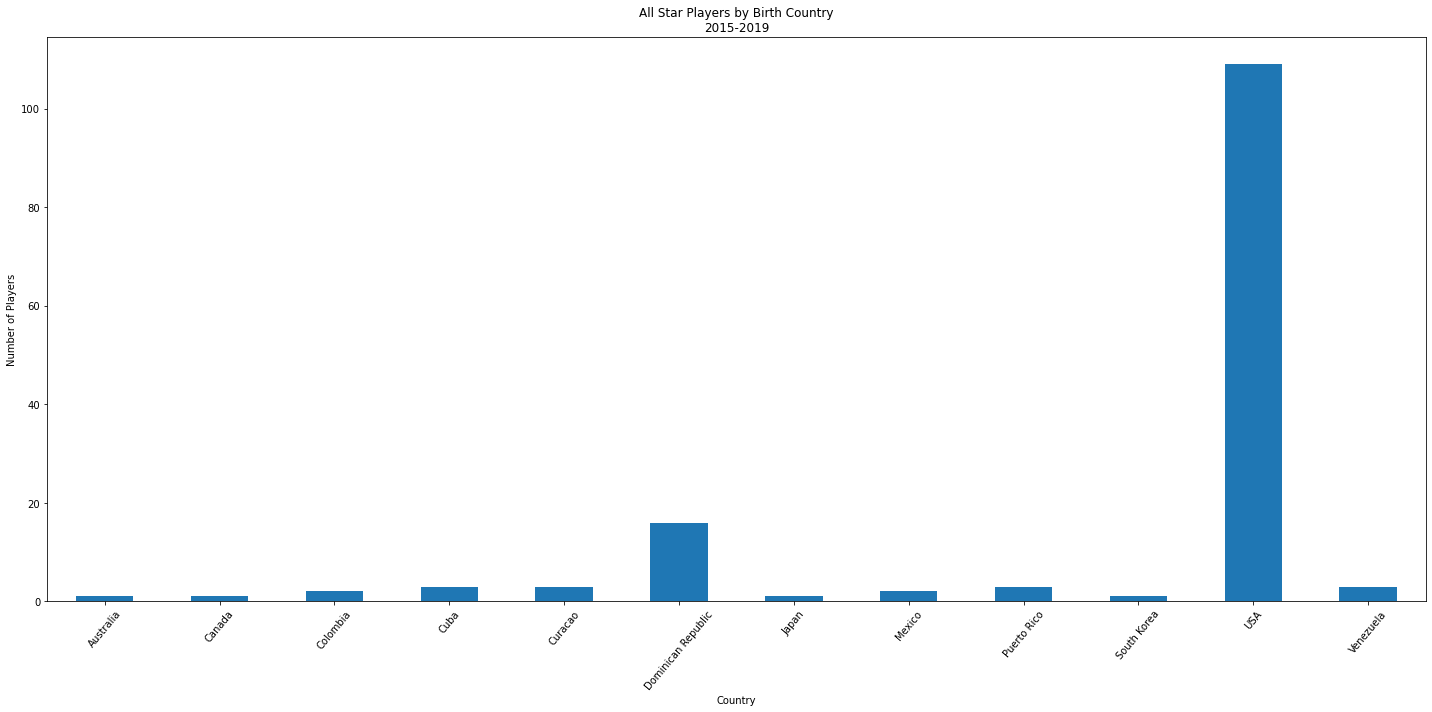

In [16]:
country_grp = players_df.groupby(['birth_country'])['birth_country'].count()
country_grp.plot(kind='bar',title='All Star Players by Birth Country\n2015-2019',
                 xlabel='Country',ylabel='Number of Players',rot=50,figsize=(20,10))
plt.tight_layout()
plt.savefig('Images/as_player_country.png')

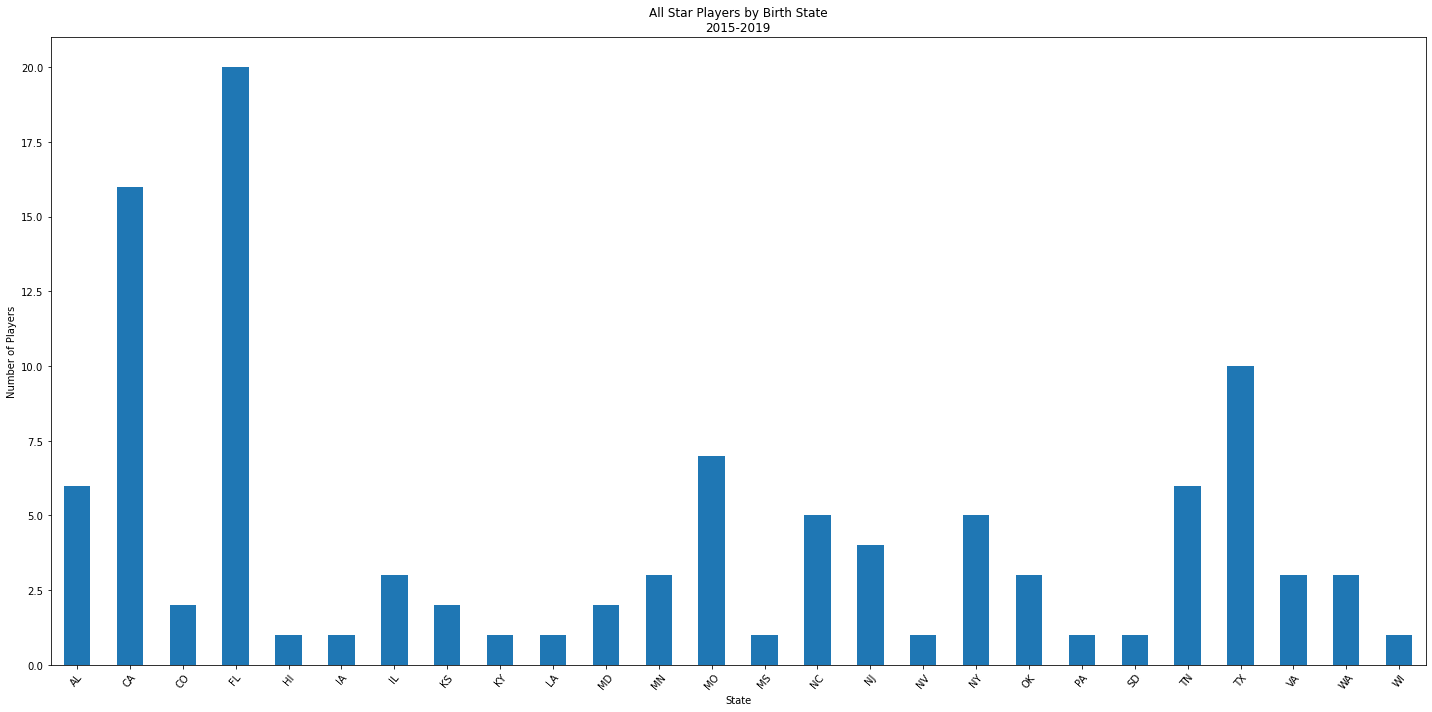

In [17]:
as_us = players_df[players_df['birth_country']=='USA']
state_grp = as_us.groupby(["birth_state"])['birth_state'].count()
state_grp.plot(kind='bar',title='All Star Players by Birth State\n2015-2019',
                 xlabel='State',ylabel='Number of Players',rot=50,figsize=(20,10))
plt.tight_layout()
plt.savefig('Images/as_player_state.png')

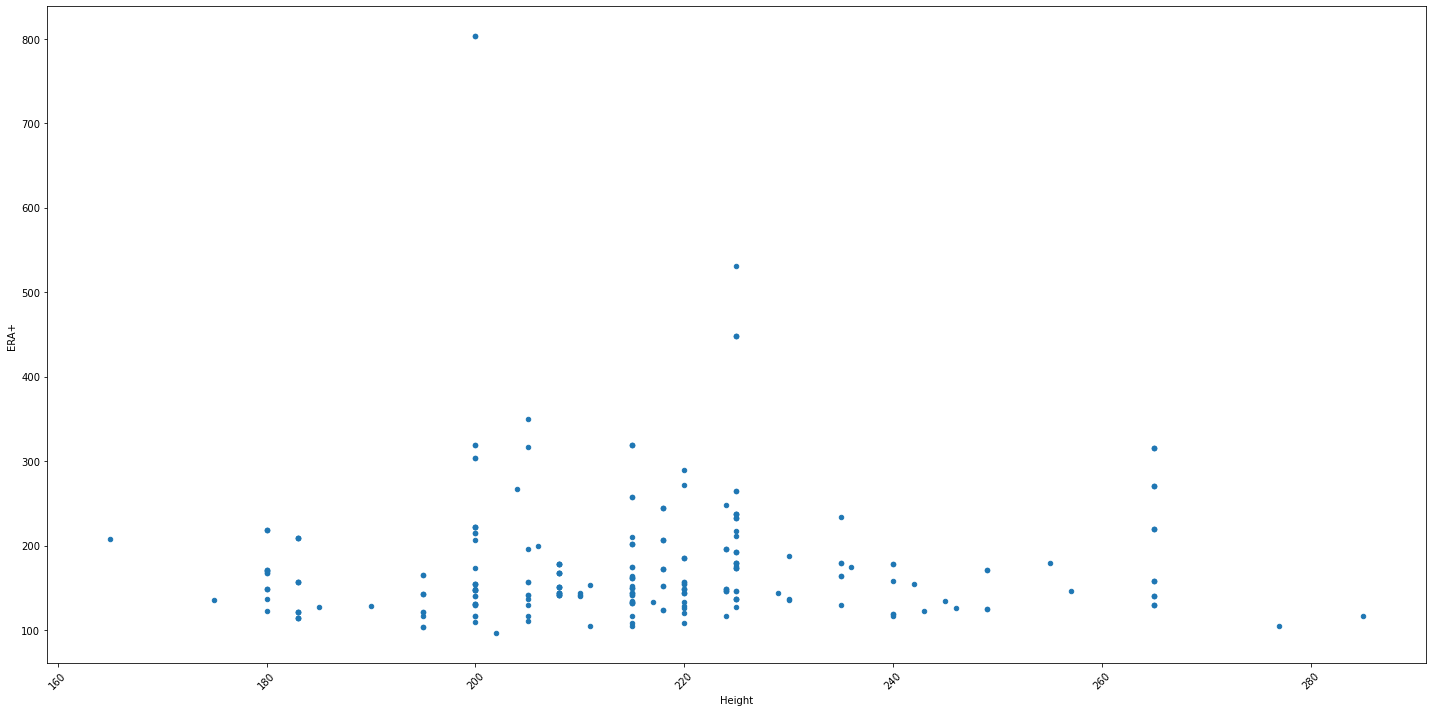

In [18]:
by_weight = pd.merge(players_df,stats_df,how='left',left_on='name_display_first_last',right_on='Player Name')
by_weight.plot('weight','ERA+',kind='scatter',rot=45,figsize=(20,10),xlabel='Height')
plt.tight_layout()
plt.savefig('Images/as_player_weight.png')

In [19]:
by_height = by_weight[['ERA+','height_inches','height_feet']].copy()
by_height.fillna(0)
by_height['height_inches'] = by_height['height_inches'].astype(str).astype(int)
by_height['height_feet'] = by_height['height_feet'].astype(str).astype(int)
inches = by_height['height_inches']
ft = by_height['height_feet']
by_height['tot']= (by_height['height_feet']*12) + by_height['height_inches']
by_height.head()

,ERA+,height_inches,height_feet,tot
0,147.0,3,6,75
1,206.0,4,6,76
2,172.0,4,6,76
3,244.0,4,6,76
4,185.0,4,6,76


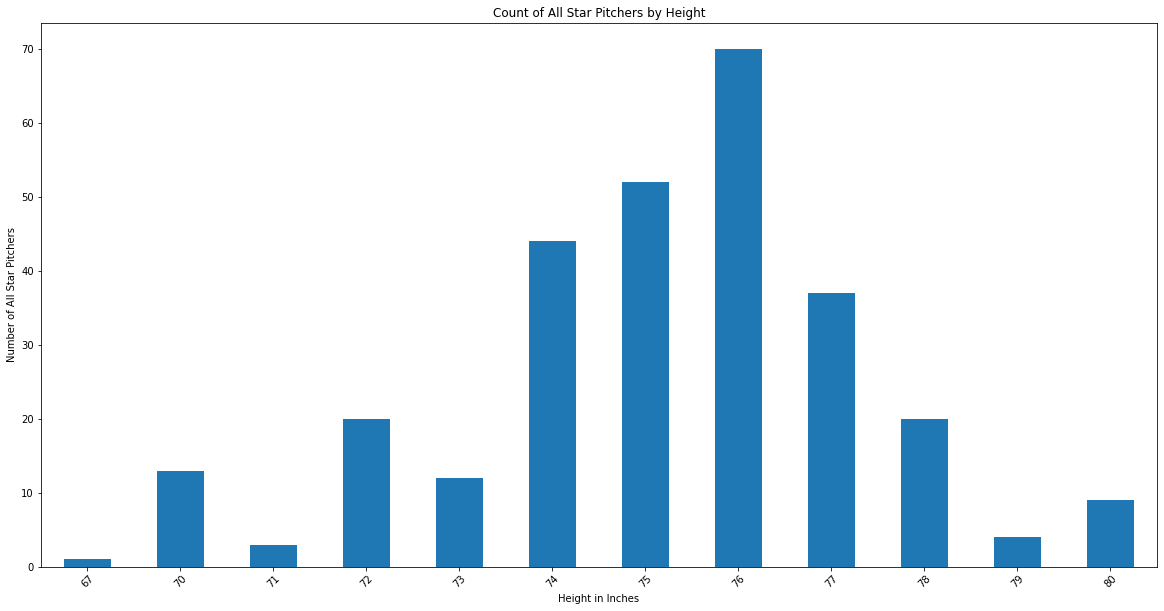

In [20]:
height_grp = by_height.groupby('tot')
height_count = height_grp['tot'].count()
height_count.plot(kind='bar',rot=45,xlabel='Height in Inches',ylabel='Number of All Star Pitchers',
                  figsize=(20,10),title='Count of All Star Pitchers by Height')
plt.tight_layout
plt.savefig('Images/as_player_height.png')